In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tck
import numpy as np
import pandas as pd
import source_files.Constants as C

In [51]:
def plotStatsGA(meanScoresFile, intervalFit, intervalSize, nticks):
        """Plot the stats from the given file for GA

        Args:
            meanScoresFile (string): the file where to read the stats
        """            
        sns.set_theme()
        data=pd.read_csv(meanScoresFile+".csv",header=1)
        fig, ax1 = plt.subplots()
        x=data.loc[:,"gen"]
        means = data.loc[:,"fitness_avg"]
        std = data.loc[:,"fitness_std"]
        meansize = data.loc[:,"size_avg"]
        stdsize = data.loc[:,"size_std"]
        
        def buildAX(ax, means, std, color, yticks, label):
            ax.plot(x,means,color+'-')
            ax.fill_between(x, means-std,means+std, alpha=0.5, facecolor=color)
            ax.set_ylabel(label, color=color)
            for tl in ax.get_yticklabels():
                tl.set_color(color)
            ax.set_ylim(*yticks)
            ax.set_yticks(np.linspace(*yticks, nticks))
            ax.yaxis.set_major_locator(tck.LinearLocator(nticks))
            
        with sns.axes_style("darkgrid"):
            ax1.set_xlabel("Generation")
            buildAX(ax1, means, std, 'b', intervalFit, "Fitness")
            ax2=ax1.twinx()
            buildAX(ax2, meansize, stdsize, 'r', intervalSize, "Size")
            ax2.grid(None)
        plt.title("Average Fitness and Size with {} as starting population".format(C.POPSIZE))
        plt.savefig(meanScoresFile+".png")
        plt.show()

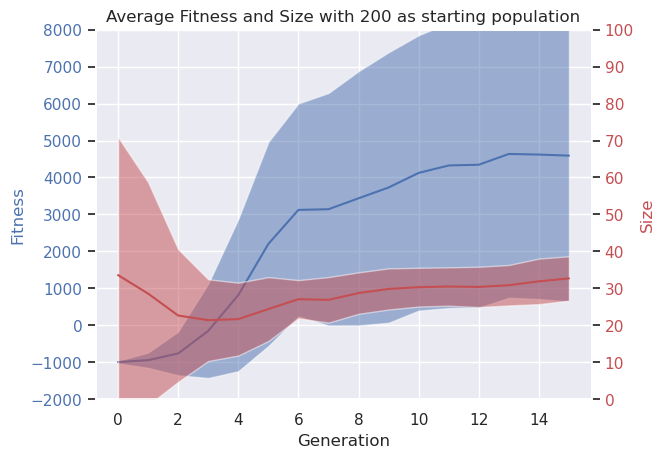

In [52]:
agent = "AgentGA/"
space = "StandardSpace/"
boost = "noBoost/"
counter = "noCounter/"
partPath = "./scores/"+agent+space+boost+counter
plotStatsGA(partPath + "pop200_ngen15_tsz10", (-2000, 8000), (0,100), 11)

In [32]:
def plotStatsRL(file):
    """Plot the stats from the given file for RL

    Args:
        file (string): the file where to read the stats
    """    
    sns.set_theme()
    data=pd.read_csv(file+".txt", skiprows=1)
    plt.xlabel("Episode")
    plt.ylabel("Score")
    plt.title("Score per episode")
    plt.plot(data)
    plt.savefig(file+".png")
    plt.show()
    

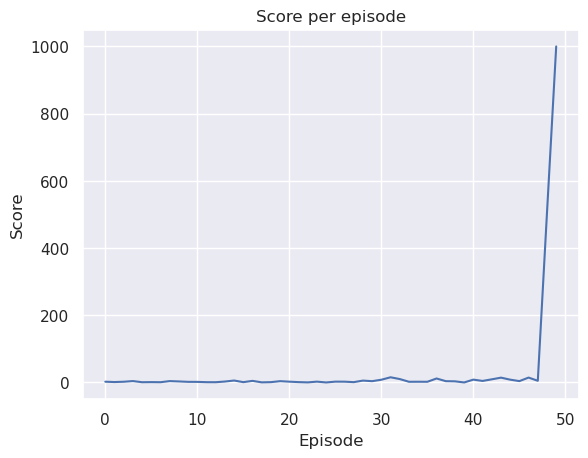

In [54]:
agent = "AgentRL/"
space = "StandardSpace/"
boost = "noBoost/"
counter = "noCounter/"
partPath = "./scores/"+agent+space+boost+counter
plotStatsRL(partPath + "neps100_epsz10_thr1000_SARSA")